# Water Potability Classification


## Data Preprocessing

In [112]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#importing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#importing Classification ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
#style for the visualizations
sns.set_style('darkgrid')

In [114]:
df =pd.read_csv(r"/content/drinking_water_potability.csv")

In [115]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [117]:
df.shape

(3276, 10)

In [118]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


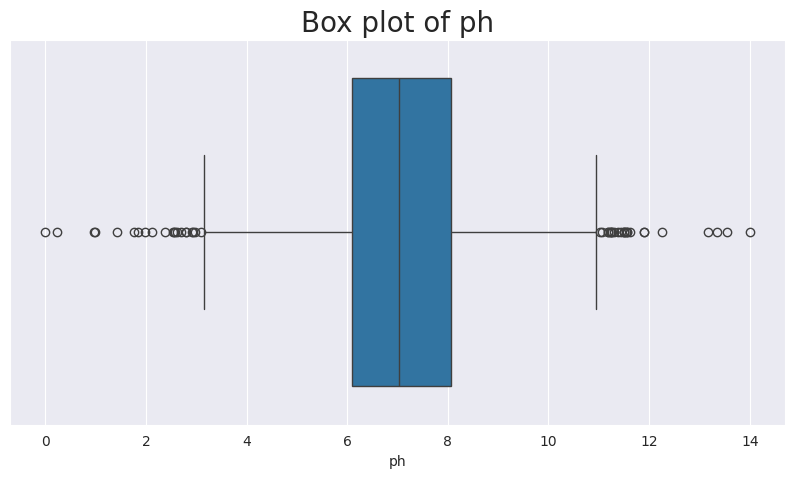

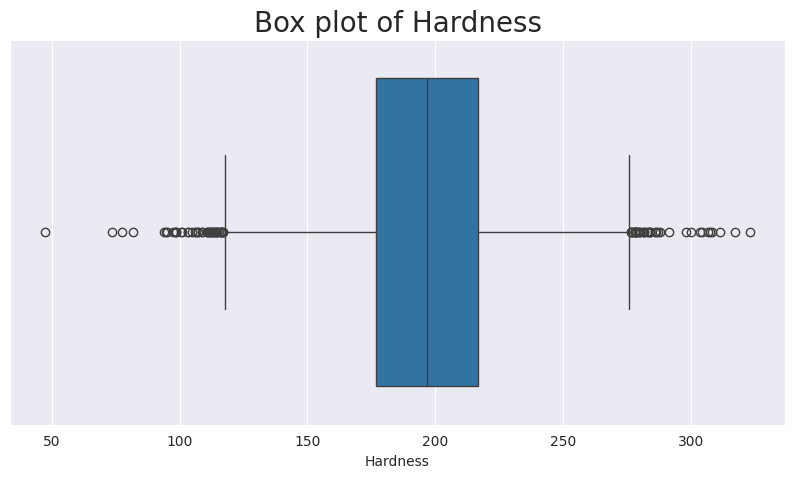

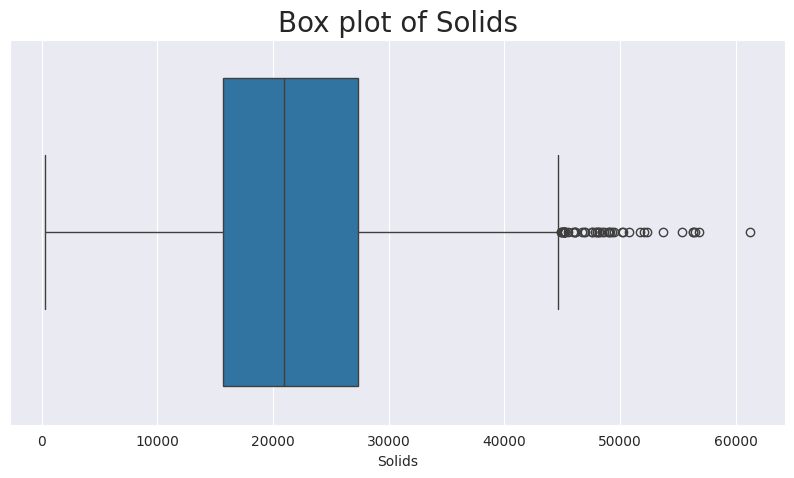

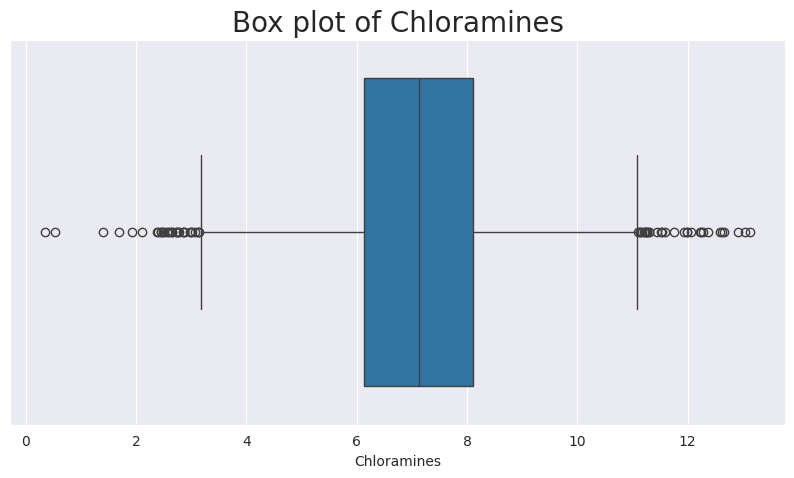

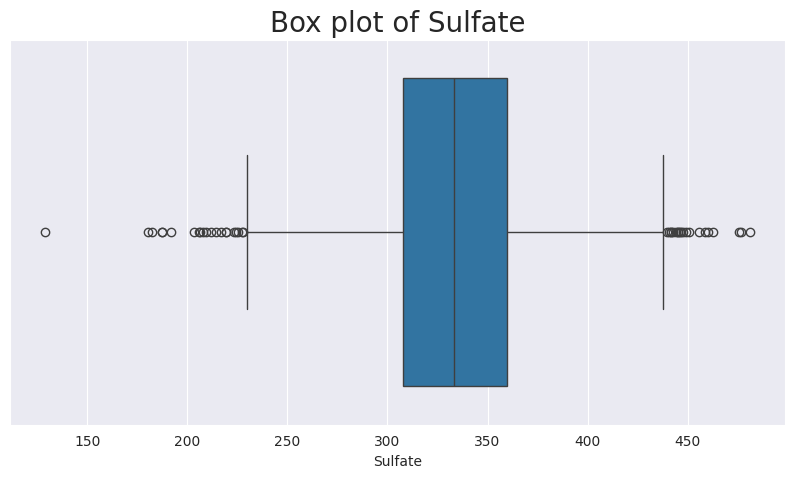

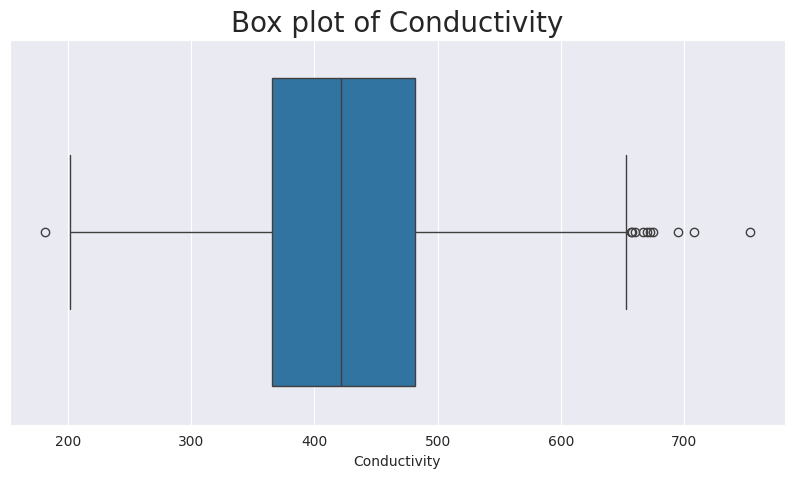

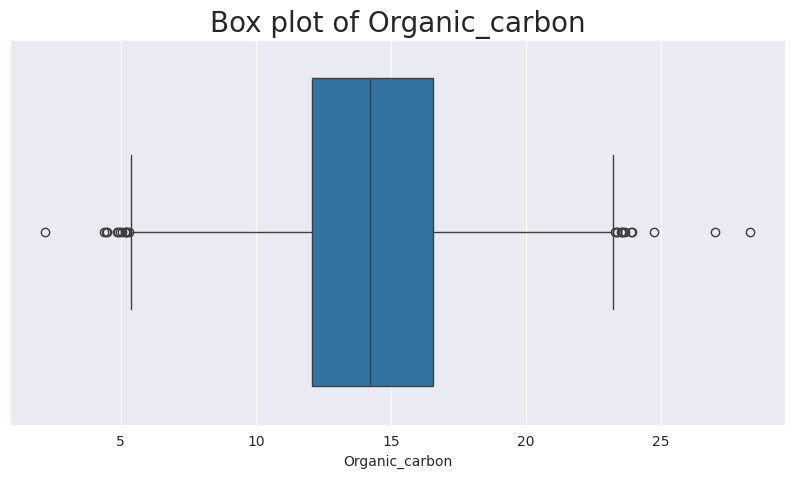

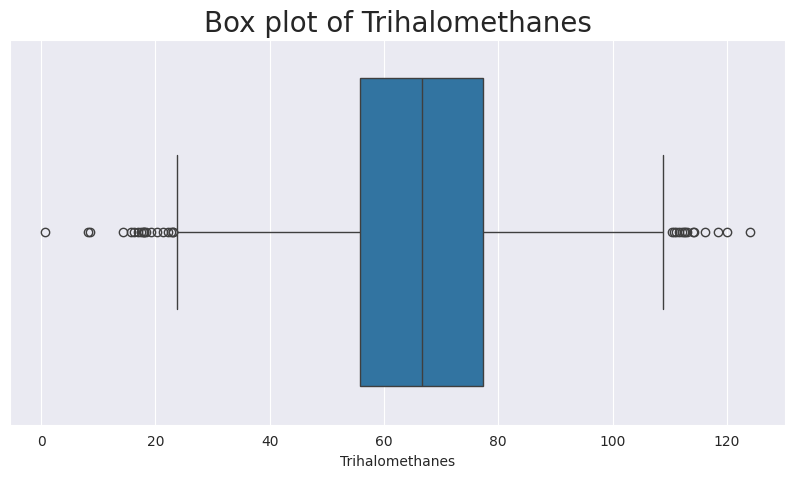

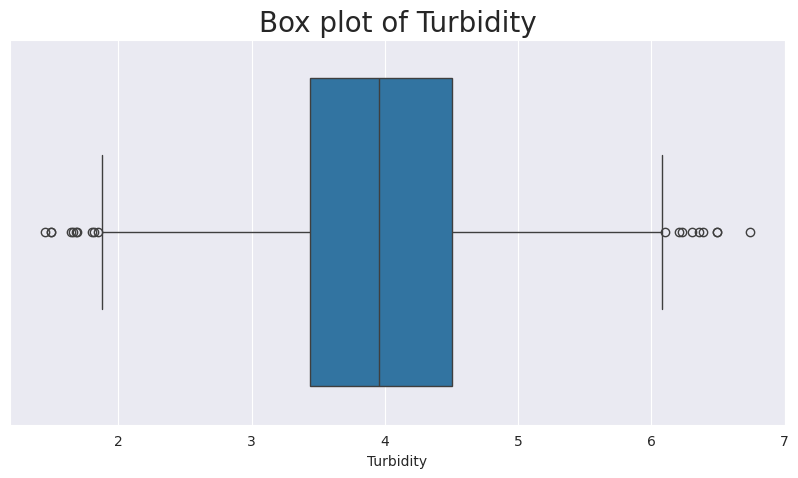

In [119]:
#Visualising the statistical summary using boxplots

for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)


In [120]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [121]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Text(0.5, 1.0, 'Histogram plot of Ph Value')

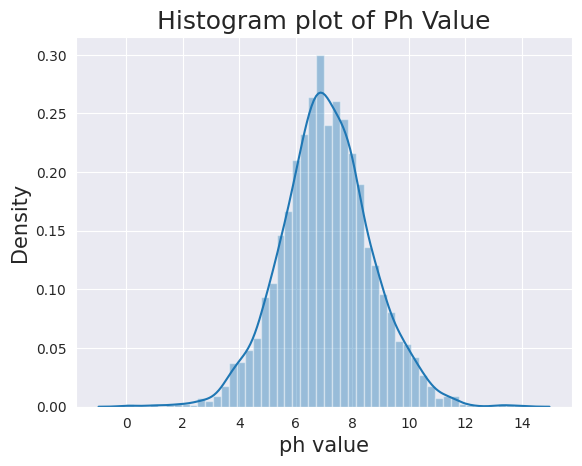

In [122]:
#To decide how to fill the null values, we plot the distribution of the columns with null values
sns.distplot(df['ph'])
plt.xlabel('ph value', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Histogram plot of Ph Value', fontsize=18)


Text(0.5, 1.0, 'Histogram plot of Sulfate')

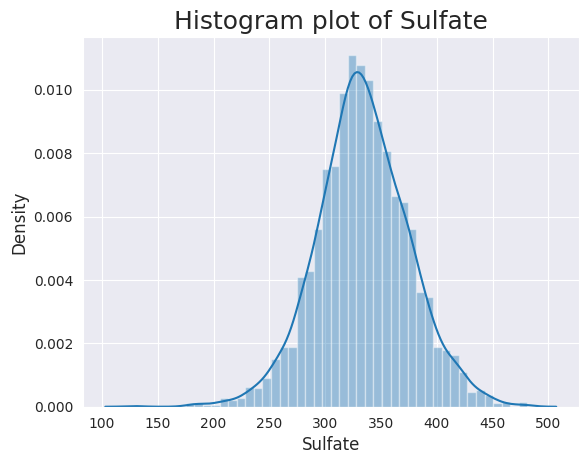

In [123]:
sns.distplot(df['Sulfate'])
plt.xlabel('Sulfate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Histogram plot of Sulfate', fontsize=18)

Text(0.5, 1.0, 'Histogram plot of Trihalomethanes')

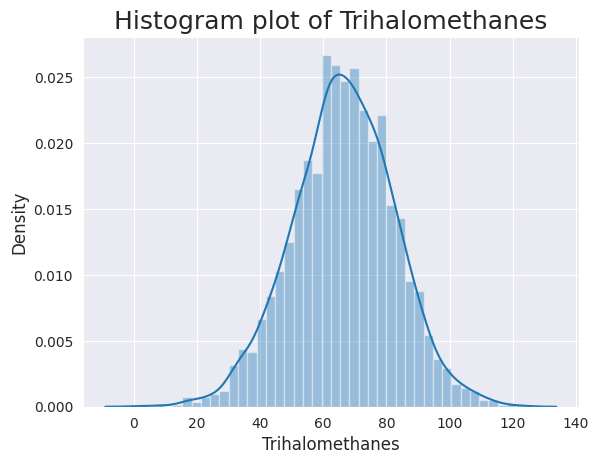

In [124]:
sns.distplot(df['Trihalomethanes'])
plt.xlabel('Trihalomethanes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Histogram plot of Trihalomethanes', fontsize=18)

In [125]:
#the columns with null values have a normal distribution thus we will fill
#the null values using mean

In [126]:
''' preparing data for model '''
#filling null values depending on the mean of each class label of Potability: to increase the accuracy of the model
ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1

In [127]:
#Check if null values have been removed
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Relational Analysis

Text(0.5, 1.0, 'Correlation Matrix')

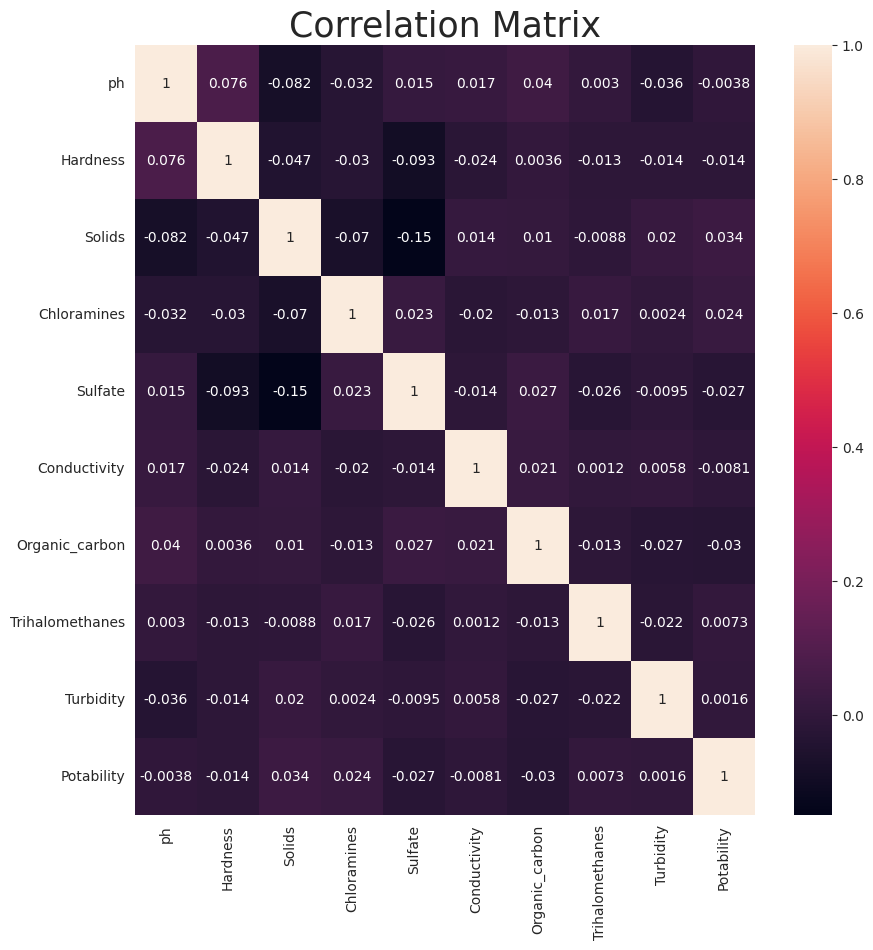

In [128]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=25)

In [ ]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data=df,hue='Potability')
#orange: potable water
#blue: not potable water

## Feature Selection

In [ ]:
# lets see feature importance
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1) #independent variables
y =df.Potability #dependent variables
Ext = ExtraTreesClassifier()
Ext.fit(x,y)
print(Ext.feature_importances_)

In [ ]:
#plotting the importance of features
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [ ]:
#All the features are important thus we will take them all for prediction

## Model Building

In [ ]:
''' independent and dependent features '''
X = df.iloc[:, :-1] #independent variable
y = df.iloc[:, -1]  #dependent variable: Potability

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

In [ ]:
#features of the given dataset fluctuate significantly within their ranges
#They are recorded in various units of measurement
#We will use Standard Scaler
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Value counts of potability: to check if the data is imbalanced
pot_lbl = df.Potability.value_counts()

#barplot
plt.figure(figsize=(8,5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('Potability',fontsize=15)
plt.ylabel('count',fontsize=15)

In [ ]:
#To fix the data imbalance, the synthetic data is created to increase the samples of the minority class
#and make them equal to the samples of the majority class
from imblearn.over_sampling import SMOTE

# apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the list of models to evaluate
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC(), GradientBoostingClassifier()]

# Define empty lists to store the performance metrics of each model
models_acc = []
models_prec = []
models_recall = []
models_f1 = []
models_roc_auc = []

# Iterate over the models and evaluate their performance
for model in models:
    # 1. Model Training
    model.fit(X_train, y_train)

    # Predict the labels of the test data
    pred = model.predict(X_test)

    #2.Model Evaluation
    # Compute the performance metrics and append them to the corresponding lists
    models_acc.append(accuracy_score(y_test, pred))
    models_prec.append(precision_score(y_test, pred))
    models_recall.append(recall_score(y_test, pred))
    models_f1.append(f1_score(y_test, pred))
    models_roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)))


In [ ]:
''' creating dataframe '''
res = pd.DataFrame({
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC','GradientBoosting'],
    'Accuracy': models_acc,
    'Precision': models_prec,
    'Recall': models_recall,
    'F1-Score': models_f1,
    'ROC-AUC': models_roc_auc

})

In [ ]:
res.sort_values(by=['Accuracy'], ascending=False)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

# define colors for each metric
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# sort models by accuracy
res = res.sort_values(by=["Accuracy"], ascending=False)

# plot horizontal bar chart with different colors for each metric
res.plot(x="Model Name", y=["Accuracy", "Precision", "Recall", "F1-Score","ROC-AUC"], kind="barh", ax=ax, color=colors, width=0.75)

# add title and axis labels
ax.set_title("Fig 16: Model Performance Metrics", fontsize=18, fontweight="bold")

ax.set_xlabel("Score", fontsize=14)
ax.set_ylabel("Model Name", fontsize=14)

# add grid lines
ax.grid(axis="x", linestyle="dashed", alpha=0.7)

plt.show()


In [ ]:
#Random Forest has the best overall performance

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_iris
from scipy.stats import randint

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 11),   # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2']      # Number of features to consider at every split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=3,       # 3-fold cross-validation
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=7,
    min_samples_split=9,
    n_estimators=166,
    n_jobs=-1  # Use all CPU cores for faster training
)

# Fit the model on training data
rf_best.fit(X_train, y_train)

# Predict with the best model
y_pred_best = rf_best.predict(X_test)

# Calculate accuracy or other metrics
rf_best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Random Forest Model Accuracy: {rf_best_accuracy:.4f}')

# Optional: Print detailed classification metrics (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Optional: Perform Cross-Validation to evaluate performance across the entire training set
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')


## Output prediction

In [ ]:

# Initialize a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Train the random forest model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)
print(y_pred)

